<a href="https://colab.research.google.com/github/mateuszklimczyk97/data-science-bootcamp/blob/main/06_uczenie_maszynowe/09_svm_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import bibliotek

In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

### Wczytywanie danych

In [5]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
images = digits.images
labels = digits.target
print('images shapes', images.shape)
print('labels shapes', labels.shape)

images shapes (1797, 8, 8)
labels shapes (1797,)


In [8]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Wyświetlanie kilku obrazów

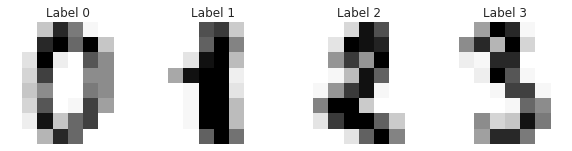

In [9]:
plt.figure(figsize=(10,10))
for index, (image,label) in enumerate(list(zip(images,labels))[:4]):
  plt.subplot(2,4,index+1)
  plt.axis('off')
  plt.imshow(image,cmap='Greys')
  plt.title('Label {}'.format(index,label))

### Przygotowanie danych do modelu

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images,labels)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

print()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [13]:
X_train[0]

array([ 0.,  0.,  3., 15., 16., 16.,  6.,  0.,  0.,  0.,  3., 14.,  7.,
       15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,
        2.,  9., 15., 16., 14.,  0.,  0.,  0.,  7., 16., 14.,  6.,  2.,
        0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.])

In [14]:
y_train[0]

7

### Trenowanie modelu

In [15]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001)
classifier.fit(X_train,y_train)

SVC(gamma=0.001)

### Ocena modelu

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 9, 2, 0, 0, 7, 9, 1, 8, 0, 6, 9, 8, 0, 2, 4, 3, 7, 4, 6, 6,
       6, 2, 1, 7, 2, 3, 2, 2, 4, 6, 4, 9, 9, 4, 0, 4, 9, 5, 6, 2, 8, 7,
       9, 4, 0, 1, 6, 7, 2, 1, 3, 5, 1, 2, 0, 3, 5, 4, 1, 9, 9, 2, 5, 4,
       3, 0, 5, 3, 5, 1, 0, 3, 8, 0, 1, 5, 2, 6, 1, 3, 4, 9, 7, 4, 9, 0,
       0, 4, 6, 6, 8, 0, 9, 6, 5, 8, 2, 0, 5, 8, 9, 2, 1, 1, 2, 2, 0, 5,
       2, 9, 7, 3, 3, 5, 7, 3, 4, 0, 3, 8, 5, 2, 2, 7, 4, 7, 2, 8, 1, 4,
       5, 2, 7, 1, 7, 5, 4, 3, 3, 1, 4, 0, 8, 9, 0, 6, 6, 1, 8, 1, 6, 4,
       0, 7, 3, 1, 9, 9, 7, 8, 9, 3, 7, 7, 2, 4, 8, 6, 9, 8, 0, 6, 8, 7,
       4, 8, 4, 4, 1, 5, 1, 5, 1, 3, 0, 2, 3, 3, 5, 3, 2, 4, 4, 2, 4, 5,
       2, 3, 7, 4, 3, 6, 9, 5, 5, 7, 6, 8, 7, 9, 3, 9, 6, 4, 5, 0, 4, 6,
       6, 1, 5, 6, 1, 5, 5, 2, 7, 7, 4, 6, 1, 6, 7, 7, 2, 3, 2, 5, 1, 9,
       3, 2, 2, 0, 3, 5, 6, 9, 8, 3, 3, 1, 1, 5, 6, 1, 7, 5, 8, 2, 0, 1,
       7, 9, 7, 1, 1, 3, 9, 3, 5, 1, 3, 0, 2, 5, 0, 0, 8, 9, 7, 5, 1, 7,
       1, 5, 3, 6, 3, 0, 4, 5, 0, 6, 0, 6, 9, 3, 5,

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        49
           5       1.00      0.98      0.99        49
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        46
           8       1.00      0.97      0.99        35
           9       0.98      1.00      0.99        41

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [18]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41]])

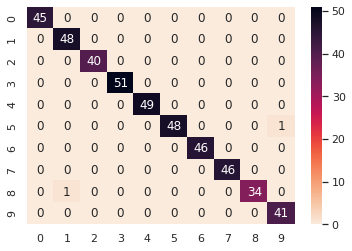

In [19]:
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [21]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

### Wyświetlanie błędnych predykcji

In [22]:
results = pd.DataFrame (data={'y_pred':y_pred, 'y_test':y_test})
results.head(10)

,y_pred,y_test
0,2,2
1,1,1
2,9,9
3,2,2
4,0,0
5,0,0
6,7,7
7,9,9
8,1,1
9,8,8


In [23]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs 

[51, 281]

In [24]:
results.loc[errors_idxs,:]

,y_pred,y_test
51,1,8
281,9,5


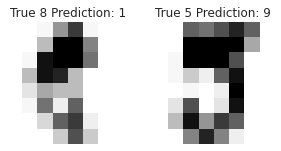

In [25]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")